problema: classificação de imagem
conceitos: 
    classificação não supersionada: 

In [4]:
library(raster)
library(sf)
library(terra)
library(viridis)

Carregando pacotes exigidos: sp

Linking to GEOS 3.13.0, GDAL 3.10.2, PROJ 9.5.1; sf_use_s2() is TRUE

terra 1.8.29

Carregando pacotes exigidos: viridisLite



In [6]:
manaus_landsat <- "/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/aula_07/manaus_landsat.tif"

In [7]:
manaus_landsat_rast <- raster::brick(manaus_landsat)
manaus_landsat_rast

class      : RasterBrick 
dimensions : 917, 1114, 1021538, 8  (nrow, ncol, ncell, nlayers)
resolution : 30, 30  (x, y)
extent     : 820599.5, 854019.5, 9649954, 9677464  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=20 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs 
source     : manaus_landsat.tif 
names      : A, B, G, R, N, S1, S2, T1 


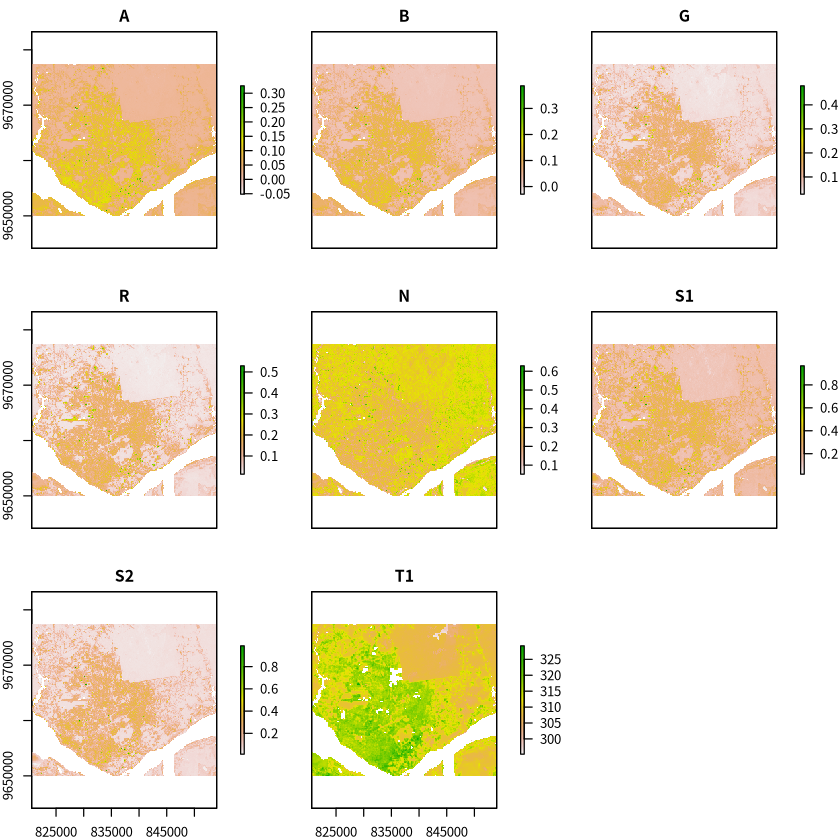

In [8]:
plot(manaus_landsat_rast)

Reading layer `AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol' from data source 
  `/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/Bairros/Bairros/AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 63 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 153580.8 ymin: 9649981 xmax: 186996.9 ymax: 9677469
Projected CRS: SIRGAS 2000 / UTM zone 21S


Warning message in CPL_transform(x, crs, aoi, pipeline, reverse, desired_accuracy, :
“GDAL Error 1: PROJ: proj_create_from_database: crs not found: EPSG:-1”


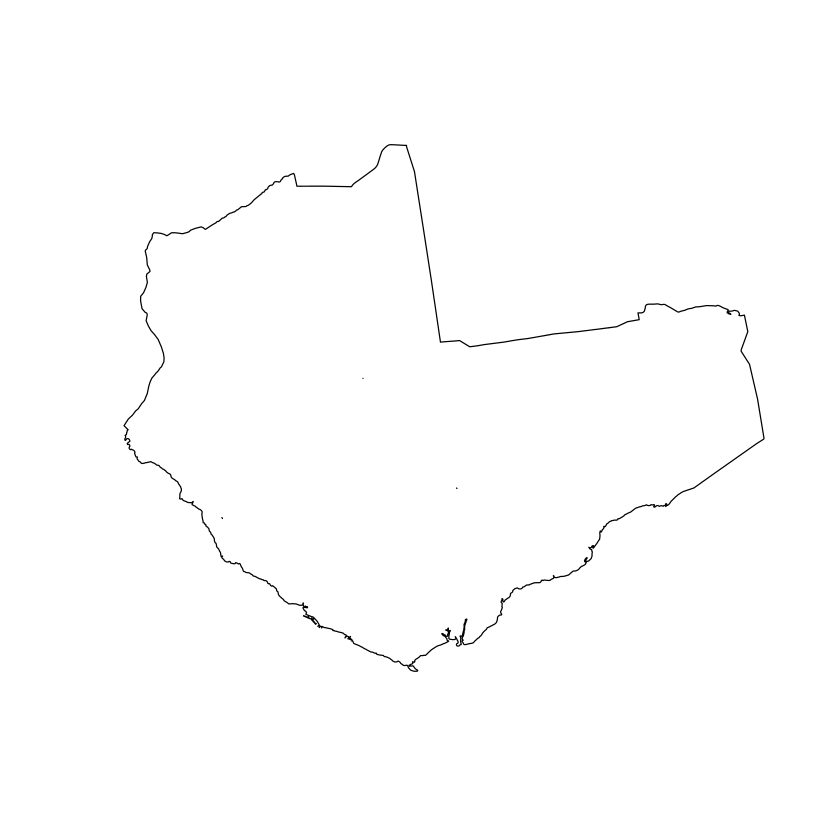

In [10]:
manaus_map <- sf::st_read("/home/huguinho/Documents/GitHub/introduction_to_geo_statistics/Bairros/Bairros/AreaUrbanaTotalBairrosManaus_UTMSIRGAS2000_pol.shp")
manaus_map <- sf::st_transform(manaus_map, crs = "EPSG:31980") 
map <- sf::st_union(manaus_map) |> sf::st_sf()
plot(map)

In [11]:
##--Identificando as bandas em uma imagem landasat 8:
A = utravioleta; B = blue (azul); G = green (verde) ; R = red (vermelho)
N = nir (infravermelho próximo); S1 = infravermelho médio;
S2 = infravermelho distante; T1 = infravermelho térmico (ver imagem)

ERROR: Error in parse(text = input): <text>:3:24: unexpected symbol
2: A = utravioleta; B = blue (azul); G = green (verde) ; R = red (vermelho)
3: N = nir (infravermelho próximo
                          ^


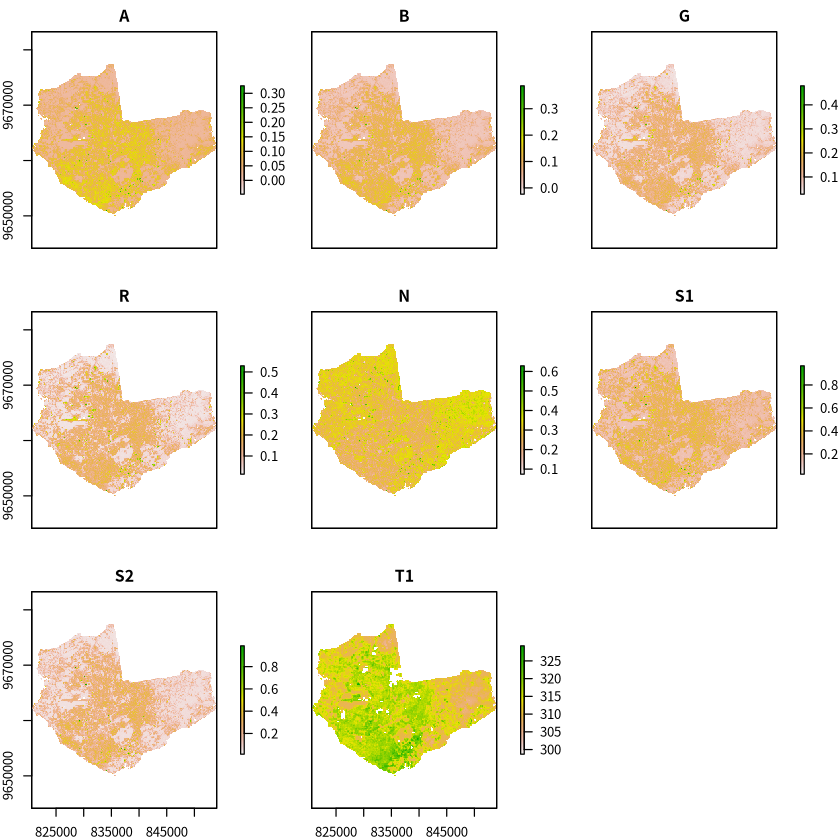

In [13]:

manaus_landsat_rast <- mask(manaus_landsat_rast, map)
plot(manaus_landsat_rast)

In [14]:

##--Visualização interativa--##
mapview::viewRGB(manaus_landsat_rast, r=7, g=6, b=4, na.col="transparent")

Warning message in rasterCheckSize(x, maxpixels = maxpixels):
“maximum number of pixels for Raster* viewing is 5e+05 ; 
the supplied Raster* has 1021538 
 ... decreasing Raster* resolution to 5e+05 pixels
 to view full resolution set 'maxpixels =  1021538 '”
Warning message in CPL_crs_from_input(x):
“GDAL Message 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.”


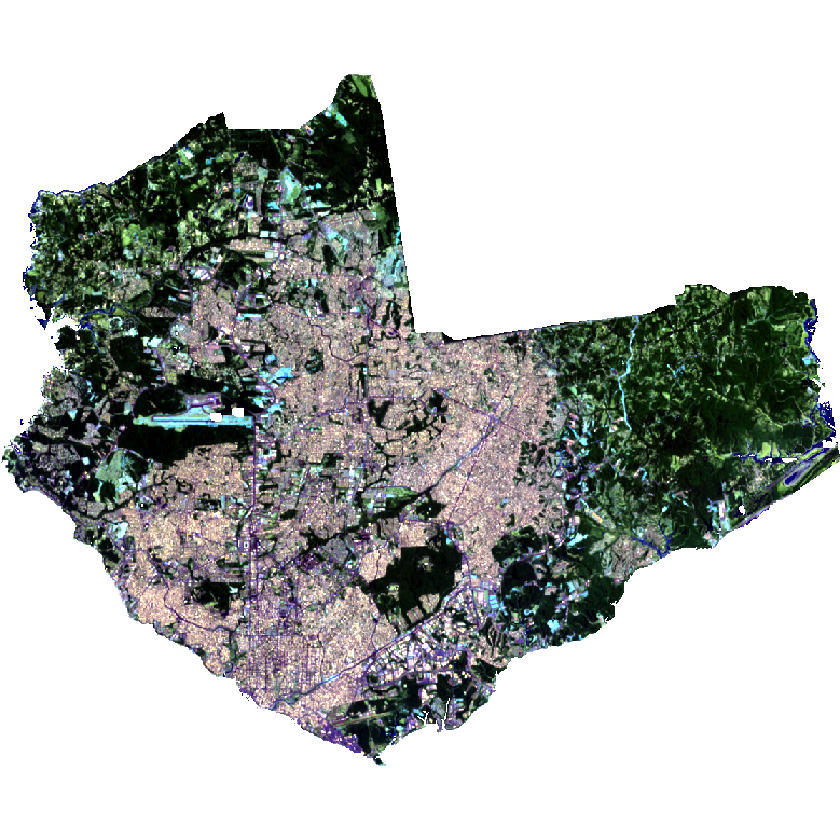

In [18]:

##--Interpretando Imagens De Satélite Em Infravermelho Colorido--##
plotRGB(manaus_landsat_rast, r=7, g=6, b=4, stretch="lin")

foi necessário mudar os parâmetros de RGB no código acima para ter acesso a uma imagem mais realista

In [ ]:

##- Para interpretando Ima.Sat acessar o link:
https://eos.com/pt/blog/interpretacao-de-imagens-de-satelites/

In [ ]:
install.packages("tmaptools")

also installing the dependencies ‘abind’, ‘lwgeom’, ‘stars’, ‘dichromat’, ‘XML’


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 0 != reported length 0”
Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/stars_0.6-8.tar.gz': Timeout of 60 seconds was reached”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/src/contrib/stars_0.6-8.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘stars’ failed”
Warning message in install.packages("tmaptools"):
“installation of package ‘lwgeom’ had non-zero exit status”
Warning message in install.packages("tmaptools"):
“installation of package ‘XML’ had non-zero exit status”
Warning message in install.packages("tmaptools"):
“installation of package ‘tmaptools’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
# desenvolver um código de classificação de imagem usando classificação não supervisionada

In [56]:
imagem <- subset(manaus_landsat_rast, 2:7)

In [58]:

v = getValues(imagem)
# omissão de na's

i = which(!is.na(v))
v = na.omit(v)
# limpeza de na's

head(v)

B,G,R,N,S1,S2
0.04268750,0.06846875,0.05810125,0.3080075,0.1821537,0.09290250
0.04059750,0.06714875,0.05463625,0.3243150,0.1812463,0.08895625
0.03923625,0.06613125,0.05345375,0.3329225,0.1878462,0.09008375
0.04322375,0.06811125,0.05909125,0.3290862,0.2127337,0.10498875
0.06529250,0.09240750,0.09258625,0.2981625,0.2824875,0.16926999
0.08066500,0.11099750,0.11670375,0.2759150,0.3153500,0.20738500


In [59]:
e = kmeans(v, 10, iter.max = 50, nstart = 1)
e$cluster
e$size

[1] 10 10 10 10  7  3  7  7  7  7  7  7  7  9  9  7  6  6  6 10 10  7  3  3
   [25]  3  3  7  7  7  7  7  7  7  7  7  7  3  3  3  3  7  7  7  7  7  7  7  7
   [49]  6  6  6  6  6 10 10 10  7  3  3  3  3  3  3  7 10 10  7  7  7  7  7  7
   [73]  7  7  7  7  7  7  7  3  9  7  3  7  6  6  6  6  6  6 10 10  7  3  3  3
   [97]  3  3  3  7  7 10  7  7  7  7  7  7  7  7  7  7  7 10  7  3  3  3  3  3
  [121]  7  6  6  6 10 10  6 10 10 10  7  7  3  3  3  7  7  7  7  7  7  7  7  7
  [145]  7  7  7  7  7  7  7  7  3  4  5  3  3  3  7 10  6 10 10 10  6 10 10 10
  [169]  7  3  3  3  3  7  7  7  7  7  7 10 10 10 10 10  7  7  7  7  3  3  3  3
  [193]  4  7  7  7  7  7  7 10 10  7 10 10  6  6 10 10  7  3  3  3  7  7  7  7
  [217]  7  7 10 10 10 10 10 10  7  7  7  3  3  3  3  4  3  7  7  6  6  6 10  7
  [241]  7  7  7 10 10  6  6 10 10  7  7  7  7  7  7  7  7  7  7 10 10 10 10 10
  [265] 10 10 10  7  3  3  3  3  5  3 10  7  7  7  6  6  6  6  7  7 10  6  6 10
  [289] 10  6 10 10  7  7  7  7  7  7  7  7  7  7 10 10 10 10 10 10 10 10  7  3
  [313]  3  7  3  3  6 10 10  7  7  6  6  6  6  6  6  6  6  7  7  7 10  6 10  7
  [337]  7  7  7  7  7  7  7  7  7  7 10 10 10 10 10 10 10  7  7  7  7  3  5  3
  [361]  6 10 10 10 10  6  6  6  6  6  6  6  6  7  7  7  7  6 10 10  7  7  7  7
  [385]  3  7  7  7  7  7  7 10 10 10 10 10 10  7  7  7  7  7  3  3  6  6 10 10
  [409]  6 10  6  6  6  6  6  6  6  6  7  7  7  7  6 10 10 10  7  7  7  3  3  3
  [433]  7  7  7  7 10 10 10 10 10 10  7  7  7  7  7  3  9  6  6  6 10 10 10  6
  [457]  6  6  6  6  6  6  6 10  7  7  7  7  7  6 10 10  7  7  7  7  7  3  7  7
  [481]  7  7  7 10 10 10 10 10  7  7  7  7  3  3  9  7  6  6  6 10 10 10 10 10
  [505]  6  6  6  6  6 10  7  3  3  3  3  7  7 10 10 10  7  7  7  7  7  7  7  7
  [529]  7  7  7 10 10 10 10  7 10  7  3  3  7  9  7  6  6  6 10 10  7  7 10  6
  [553]  6  6  6  6  6 10  7  3  3  3  3  3  7 10 10  7  7  7  7  7  7  7  7  7
  [577]  7  7 10 10 10 10 10  6  7  3  3  7  7  7  6  6  6  6 10 10  7  7  7  6
  [601]  6  6  6  6  6  6  6  7  7  3  3  3  3 10 10 10  7  7  7  7  7  7  7  7
  [625]  7  7  7 10 10 10 10  6  7  3  3  7  7  7  7  6  6  6 10 10 10 10  7  7
  [649]  7  6  6  6  6  6  6  6  6 10  7  3  3  3  7  6 10  7  7  7  7  7  7  7
  [673]  7  7  7  7  7 10 10 10  6  7  3  3  7 10  7  3  6  6 10 10 10 10 10  7
  [697]  7  7 10  6  6  6  6  6  6  6  6  7  7  3  3  7 10 10 10  7  7  7  7  7
  [721]  7  3  3  7  7  7 10 10 10  6 10  3  7  7  7  7  9  1  6  6  6  6 10 10
  [745] 10 10  7 10  6  6  6  6  6  6  6  6  6  7  3  3  3  3  7 10 10 10  7  7
  [769]  7  7  7  3  3  3  7  7 10 10 10  6 10  7  7  7  7 10  9  3  7 10  6  6
  [793] 10 10 10 10 10 10 10  6  6  6  6  6  6  6 10  7  7  3  3  3  3  7 10 10
  [817] 10  7  7  7  7  7  3  3  3  7  7  7 10 10  6  6  7  7  7  7  7  3  3  7
  [841] 10 10 10 10 10 10 10 10  6  6  6  6  6  6  6  6 10  7  7  7  7  3  3  3
  [865]  7 10 10 10 10  7  7  7  7  7  7  3  7  7  7 10 10 10  6 10  7  3  7  7
  [889]  7  3  7  6 10 10 10  7  7 10 10 10  6  6  6  6  6  6  6  6 10  7  7  7
  [913]  7  3  3  7 10 10 10 10 10 10  7  7  7  7  7  7  7  7  7 10 10 10  6  6
  [937] 10  3  7  7  7  3  7  7  7 10  7  7  7  7 10 10  6  6  6  6  6  6  6  6
  [961]  6 10  7  7  3  7  7 10 10 10 10 10 10 10  7  7  7  7  7  7  7  7  7  7
  [985] 10 10  6  6 10  7  3  3  3  7  3  7  7 10 10 10  7  7  7 10 10  6  6  6
 [1009]  6  6  6  6  6  6  6 10  7  7  7  6  6 10 10 10 10 10 10 10  7  7  7  7
 [1033]  7  7  7  7  7 10 10 10 10 10 10  3  3  3  7  3  7  7 10 10 10  7  7 10
 [1057] 10 10  6  6  6  6  6 10 10  6  6  6  6  6 10  6  6  6  6  6  6  6  6 10
 [1081] 10 10  7  7  7  7  7  7  7  7 10 10 10 10 10 10  3  3  3  7  7  7 10 10
 [1105] 10 10 10 10 10 10 10  6  6  6  6  6  6  6  6 10  6  6  6  6  6  6  6  6
 [1129]  6  6  6  6  6  6  6  6 10 10  7  7  7  7  7  7 10 10 10 10 10  7  3  3
 [1153]  3  7  7  3 10 10 10 10 10 10 10 10 10  6  6  6  6  6  6  6  6  6  6  6
 [1177]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 10 10 10  7  7  7  7  7 10
 [12

[1]  26593   3366  49120  40276  81158 100697  78231   9559  72864  89986

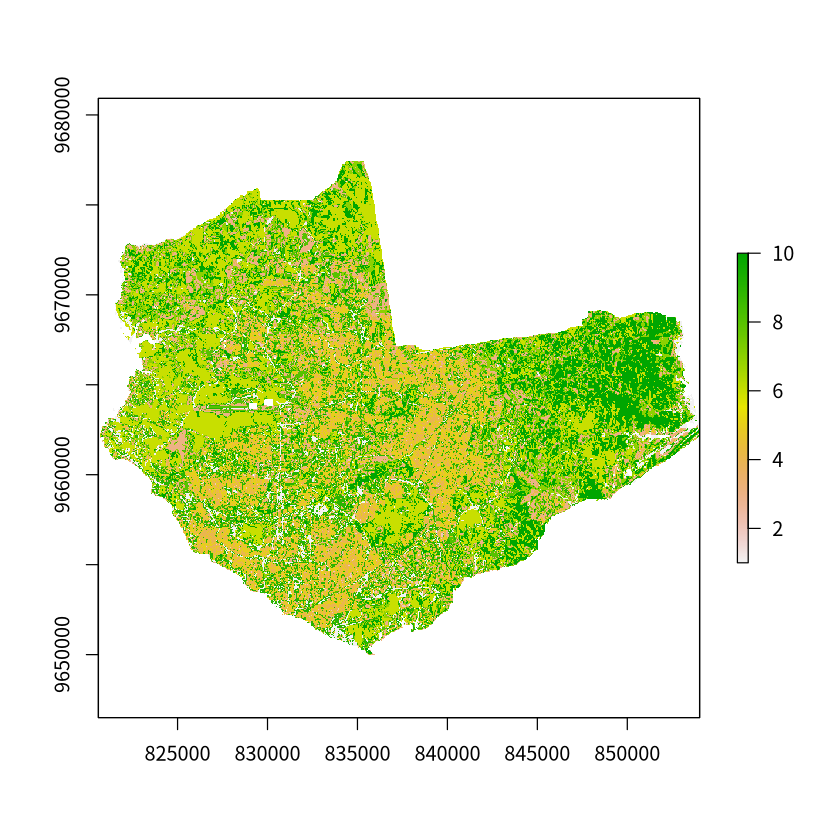

In [60]:
kmeans_raster <- raster(imagem)
kmeans_raster[i] <- e$cluster
plot(kmeans_raster)

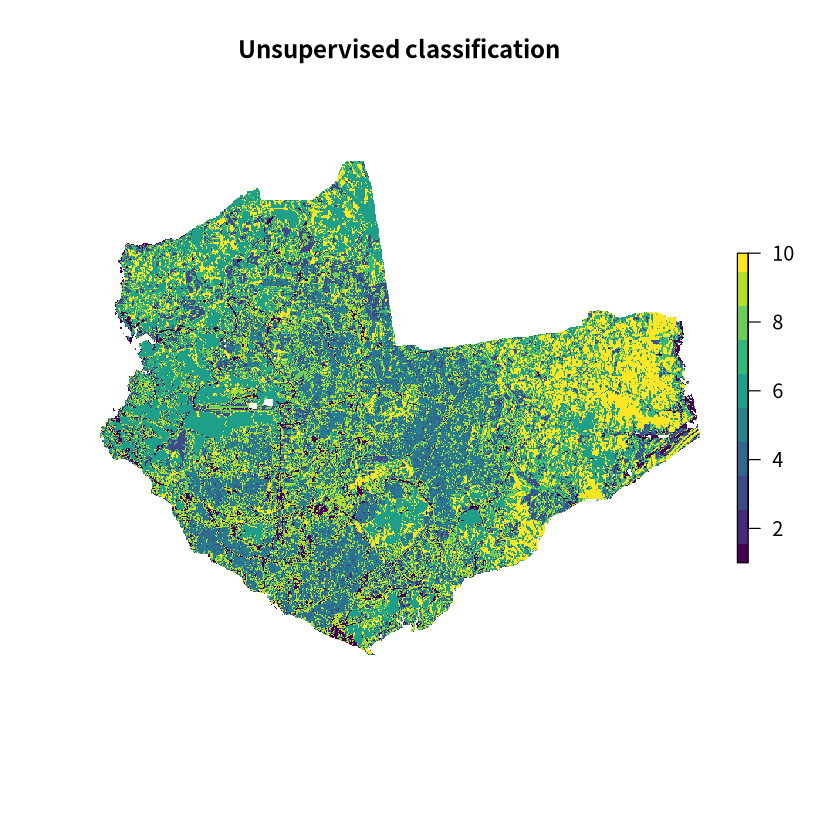

Warning message in plot.sf(manaus_map, add = TRUE):
“ignoring all but the first attribute”


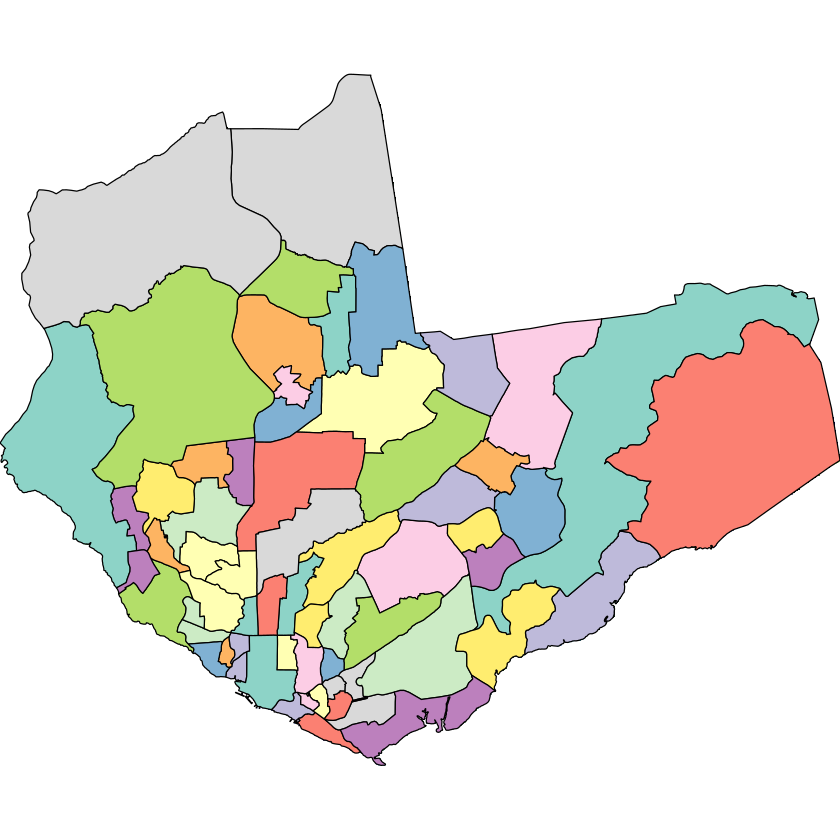

In [62]:
plot(kmeans_raster, main = 'Unsupervised classification', col = viridis::viridis(10), axes = FALSE, box = FALSE)
plotRGB(manaus_landsat_rast, r=7, g=6, b=4, stretch="lin")
plot(manaus_map, add = TRUE)

In [65]:
mycolor <- c("#fef65b","#ff0000", "#daa520","#0000ff","#00ff00","#cbbeb5",
             "#c3ff5b", "#ff7373", "#00ff00", "#808080")

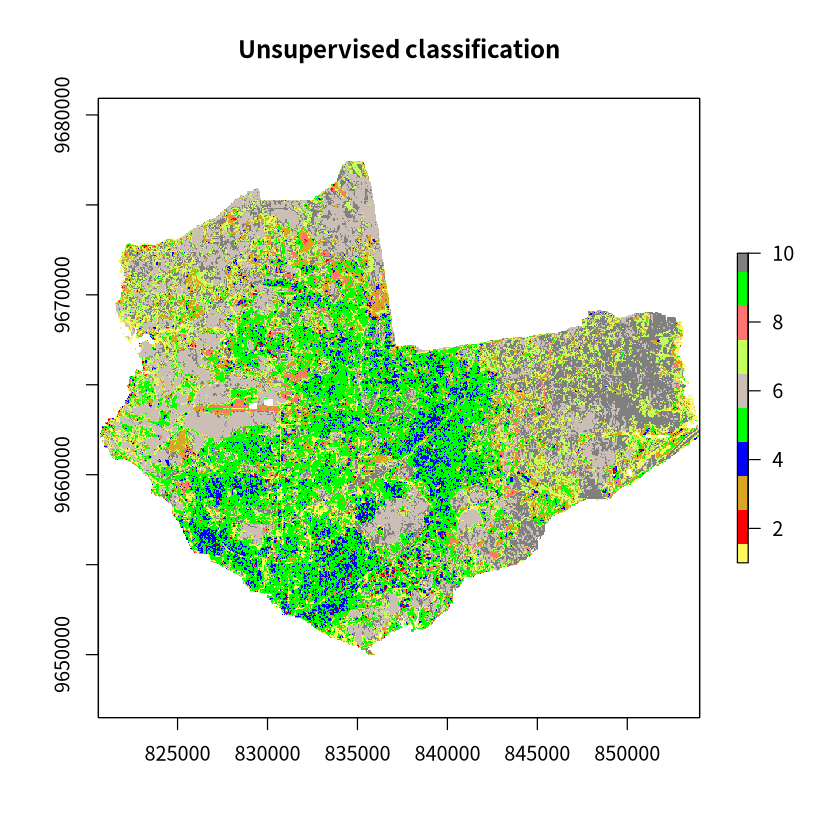

In [66]:
plot(kmeans_raster, main = 'Unsupervised classification', col = mycolor)

In [72]:
ind1 <- which(values(kmeans_raster) == 1)
ind2 <- which(values(kmeans_raster) == 2)
ind3 <- which(values(kmeans_raster) == 3)
ind4 <- which(values(kmeans_raster) == 4)
ind5 <- which(values(kmeans_raster) == 5)
ind6 <- which(values(kmeans_raster) == 6)
ind7 <- which(values(kmeans_raster) == 7)
ind8 <- which(values(kmeans_raster) == 8)
ind9 <- which(values(kmeans_raster) == 9)
ind10 <- which(values(kmeans_raster) == 10)

In [73]:
class1 <- cbind((imagem[[1]])[ind1],  (imagem[[2]])[ind1],(imagem[[3]])[ind1],(imagem[[4]])[ind1],    (imagem[[5]])[ind1],  (imagem[[6]])[ind1])
class2 <- cbind((imagem[[1]])[ind2],  (imagem[[2]])[ind2],(imagem[[3]])[ind2],(imagem[[4]])[ind2],    (imagem[[5]])[ind2],  (imagem[[6]])[ind2])
class3 <- cbind((imagem[[1]])[ind3],  (imagem[[2]])[ind3],(imagem[[3]])[ind3],(imagem[[4]])[ind3],    (imagem[[5]])[ind3],  (imagem[[6]])[ind3])
class4 <- cbind((imagem[[1]])[ind4],  (imagem[[2]])[ind4],(imagem[[3]])[ind4],(imagem[[4]])[ind4],    (imagem[[5]])[ind4],  (imagem[[6]])[ind4])
class5 <- cbind((imagem[[1]])[ind5],  (imagem[[2]])[ind5],(imagem[[3]])[ind5],(imagem[[4]])[ind5],    (imagem[[5]])[ind5],  (imagem[[6]])[ind5])
class6 <- cbind((imagem[[1]])[ind6],  (imagem[[2]])[ind6],(imagem[[3]])[ind6],(imagem[[4]])[ind6],    (imagem[[5]])[ind6],  (imagem[[6]])[ind6])
class7 <- cbind((imagem[[1]])[ind7],  (imagem[[2]])[ind7],(imagem[[3]])[ind7],(imagem[[4]])[ind7],    (imagem[[5]])[ind7],  (imagem[[6]])[ind7])
class8 <- cbind((imagem[[1]])[ind8],  (imagem[[2]])[ind8],(imagem[[3]])[ind8],(imagem[[4]])[ind8],    (imagem[[5]])[ind8],  (imagem[[6]])[ind8])
class9 <- cbind((imagem[[1]])[ind9],  (imagem[[2]])[ind9],(imagem[[3]])[ind9],(imagem[[4]])[ind9],    (imagem[[5]])[ind9],  (imagem[[6]])[ind9])
class10 <- cbind((imagem[[1]])[ind10],(imagem[[2]])[ind10],(imagem[[3]])[ind10],(imagem[[4]])[ind10], (imagem[[5]])[ind10], (imagem[[6]])[ind10])

In [76]:
##--vamos calcular o comportamento de classe nos índices espectrais
vi2 <- function(x, y) {
    (x - y) / (x + y)}

In [77]:
## calculando o comportamento das classes no NDVI
cl1  <- vi2(class1[,4], class1[,3])
cl2  <- vi2(class2[,4], class2[,3])
cl3  <- vi2(class3[,4], class3[,3])
cl4  <- vi2(class4[,4], class4[,3])
cl5  <- vi2(class5[,4], class5[,3])
cl6  <- vi2(class6[,4], class6[,3])
cl7  <- vi2(class7[,4], class7[,3])
cl8  <- vi2(class8[,4], class8[,3])
cl9  <- vi2(class9[,4], class9[,3])
cl10 <- vi2(class10[,4],class10[,3])

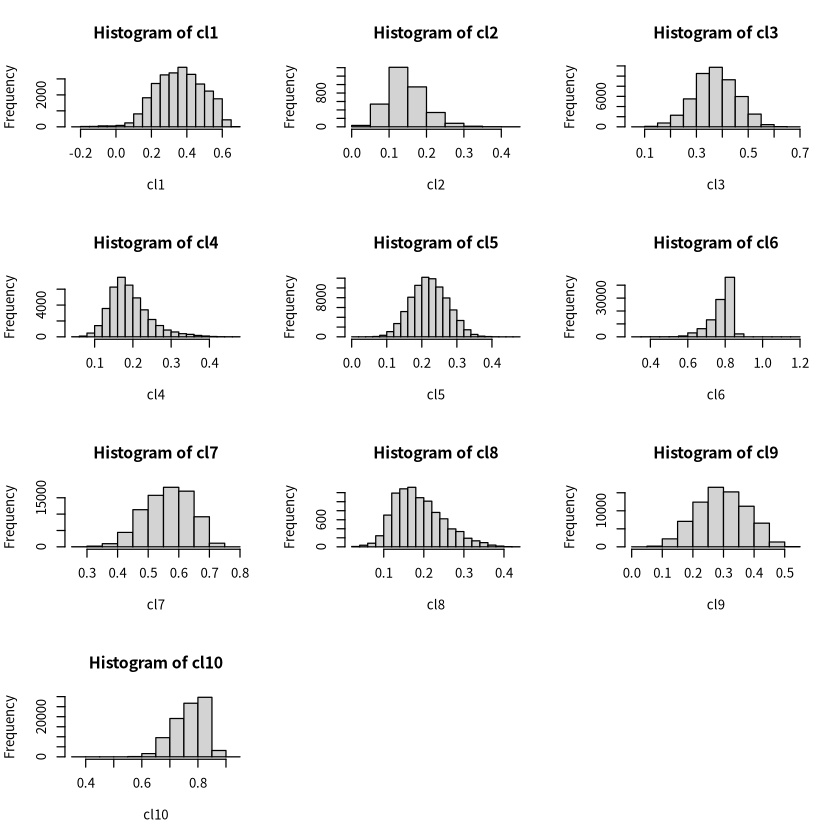

In [78]:
par(mfrow = c(4,3))
hist(cl1)
hist(cl2)
hist(cl3)
hist(cl4)
hist(cl5)
hist(cl6)
hist(cl7)
hist(cl8)
hist(cl9)
hist(cl10)

as classes com 0.6 até 0.8 são geralmente classes de vegetação sádia
de 0.4 a 0.6 podem ser vegetação menos saudável
Classes cl6, cl10 e cl7